# Gradient Boosting Regression

<div class='alert alert-success'><p>
    Refered from Documentation: <a href = "https://scikit-learn.org/dev/auto_examples/ensemble/plot_gradient_boosting_regression.html#">LINK</a></p></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target

In [14]:
print(dir(diabetes))
print(diabetes.feature_names)

['DESCR', 'data', 'data_filename', 'data_module', 'feature_names', 'frame', 'target', 'target_filename']
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Data Preprocessing

n_estimators : the number of boosting stages that will be performed. Later, we will plot deviance against boosting iterations.

max_depth : limits the number of nodes in the tree. The best value depends on the interaction of the input variables.

min_samples_split : the minimum number of samples required to split an internal node.

learning_rate : how much the contribution of each tree will shrink.

loss : loss function to optimize. The least squares function is used in this case however, there are many other options (see [GradientBoostingRegressor](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) ).

In [3]:
# Data Preprocessing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [4]:
# Fit regression model

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

# '**' is used to unpack all the elements of a dictionary, list etc.

mse = mean_squared_error(y_test, reg.predict(X_test))
print(f'The mean squared error (MSE) on test set: {mse : .4f}')

The mean squared error (MSE) on test set:  3023.6078




### PLOT TRAINING DEVIANCE

In [6]:
test_score = np.zeros((params['n_estimators'], ), dtype = np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test,  y_pred)

### USE OF `reg.staged_predict()`
Predict regression target at each stage for X.

This method allows monitoring (i.e. determine error on testing set)
after each stage

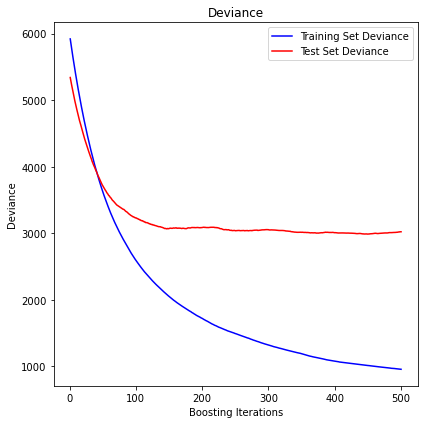

In [10]:
fig = plt.figure(figsize=(6,6))
plt.subplot(1,1,1)
plt.title('Deviance')
plt.plot(
    np.arange(params['n_estimators']) + 1,
    reg.train_score_,
    'b-',
    label='Training Set Deviance',
)

plt.plot(
    np.arange(params['n_estimators'])+1, test_score, 'r-', label='Test Set Deviance'
)

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()


In [11]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

print(feature_importance, '\n', sorted_idx, '\n', pos)

[0.05543991 0.01179631 0.33102437 0.06944062 0.02431097 0.05445577
 0.04013464 0.02603908 0.32201165 0.06534669] 
 [1 4 7 6 5 0 9 3 8 2] 
 [0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


<div class = 'alert alert-danger'><p>
    <b>Need to understand the below box again</b>
</p></div>

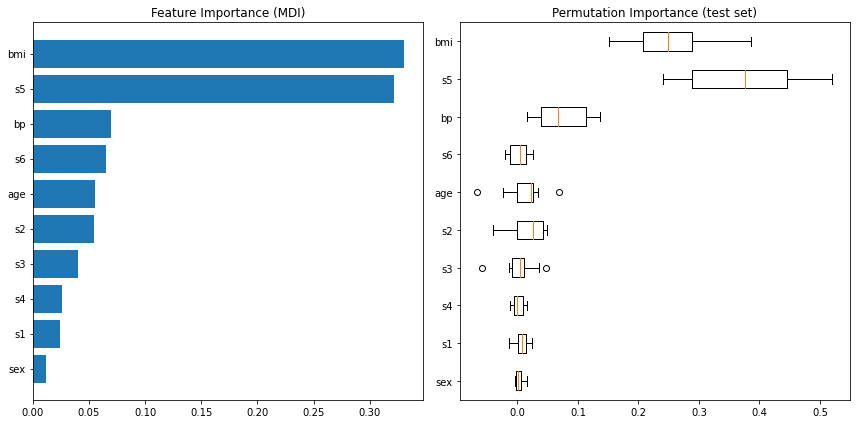

In [17]:
fig = plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")


result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T, # Notice the Transpose...
    vert=False,
    labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()